In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://drive.google.com/uc?id={}'.format('1jXTMK2K4L-vedrXbvhKzOUSjGXPbn9uB')
data = pd.read_csv(url)

# Find categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

<ipython-input-2-e9cacdd1385b>:3: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [3]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode categorical columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [4]:
# Replace empty values in categorical columns with the most common value
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    most_common_value = data[column].mode()[0]
    data[column].fillna(most_common_value, inplace=True)

# Replace empty values in numerical columns with the mean
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

In [5]:
# Split the data into input features (X) and target variable (y)
X = data.drop('X_HLTHPLN', axis=1)
y = data['X_HLTHPLN']

# Apply SMOTE to balance the classes
# smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)

# Apply RandomUnderSampler to balance classes
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)

# Apply ADASYN to balance the classes
# adasyn = ADASYN(random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create and train the random forest classifier model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(accuracy))

Accuracy on test set: 0.7645


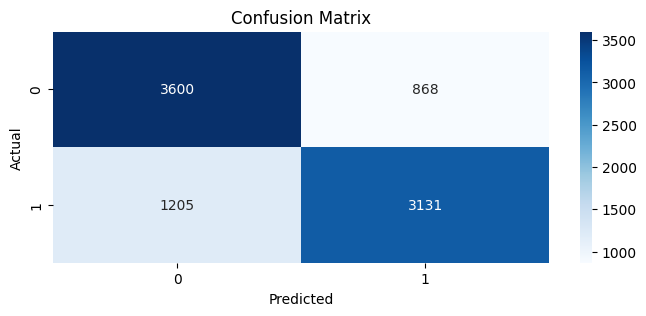

In [7]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)

# Print the classification metrics
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      4468
           1       0.78      0.72      0.75      4336

    accuracy                           0.76      8804
   macro avg       0.77      0.76      0.76      8804
weighted avg       0.77      0.76      0.76      8804



Top 10 most important features:
      Feature  Importance
10    EMPLOY1    0.086281
7       EDUCA    0.065670
28     X_BMI5    0.061682
30  X_VEGESU1    0.061310
8    RENTHOM1    0.060721
0     X_STATE    0.057341
29  X_FRUTSU1    0.054529
14    WEIGHT2    0.054017
12    INCOME3    0.048643
15      HTIN4    0.047368


In [10]:
# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print the results
print("True Positive Rate (TPR):", TPR * 100, "%")
print("True Negative Rate (TNR):", TNR * 100, "%")
print("False Positive Rate (FPR):", FPR * 100, "%")
print("False Negative Rate (FNR):", FNR * 100, "%")

True Positive Rate (TPR): 72.20940959409594 %
True Negative Rate (TNR): 80.57296329453895 %
False Positive Rate (FPR): 19.427036705461056 %
False Negative Rate (FNR): 27.79059040590406 %
